# Tarea 1 - Cuarto Módulo
## Eduardo Martínez Mayorga

In [1]:
import numpy as np
from numpy.random import seed, randn
import matplotlib.pyplot as plt

In [2]:
#semilla inicial para llegar al mismo resultado
seed(1643)
#Numero de observaciones simuladas
nobs=100
#features
X=np.linspace(0,1,nobs) + randn(nobs)*.3

#variable dependiente
theta0, theta1=.3,1.5 ####---no los conocemos

y=theta0 + theta1*X + randn(nobs)*.35

n = len(y)

Para un *training dataset (x,y) con $n$ observaciones, se puede demostrar que los valores $\theta_0^*$, $\theta_1^*$ que minimizan $J(\theta_0, \theta_1)$ son: 
$$
    \theta_1^* = \frac{n\sum_{i=1}^nx_iy_i - \left(\sum_{i=1}^nx_i\right)\left(\sum_{i=1}^ny_i\right)}{n\sum_{i=1}^nx_i^2 - \left(\sum_{i=1}^nx_i\right)^2}
$$

$$
    \theta_0^* = \frac{1}{n}\sum_{i=1}^ny_i - \theta_1^* \frac{1}{n}\sum_{i=1}^nx_i
$$

## Tarea 1 (Parte 1)
Calcular  `theta0_op`, `theta1_op` considerando las ecuaciones de arriba y comparar con los valres de `theta0` y `theta1` con los que generamos $y$ y con los que gráficamente se puede ver que son.

In [3]:
numerador = n*sum(X * y) - sum(X)*sum(y)
denominador = n*sum(np.square(X)) - sum(X)**2
theta1_op = numerador/denominador
theta1_op

1.556439922455269

In [4]:
theta0_op = np.mean(y) - theta1_op*np.mean(X)
theta0_op

0.3037582638605373

Para un problema de **regresión lineal generalizada**, el vector $\theta^* = [\theta_0, \theta_1, \ldots, \theta_m]$ de valores que minimizan $J(\theta_0, \theta_1, \ldots, \theta_m)$ dado por

$$
    \theta^* = (X^T X)^{-1} X^T y
$$

## Tarea 1 (Parte 2)

Usar la solución cerrada de la forma matricial para llegar a los valores de la Parte1. 
Tip: `np.linalg.inv` desde `numpy`. 

In [5]:
unos = np.ones(len(X)) # se crea un arreglo unidimensional de 1's
X_mat = np.stack([unos, X], axis=1) # Se crea la matriz con la primera columna de 1's

In [6]:
X_mat

array([[ 1.        , -0.53331765],
       [ 1.        , -0.72085395],
       [ 1.        , -0.04773104],
       [ 1.        ,  0.3562981 ],
       [ 1.        , -0.36521835],
       [ 1.        ,  0.27522554],
       [ 1.        ,  0.3792767 ],
       [ 1.        , -0.11798335],
       [ 1.        ,  0.01600945],
       [ 1.        ,  0.46986782],
       [ 1.        ,  0.25416652],
       [ 1.        , -0.06348842],
       [ 1.        ,  0.54217758],
       [ 1.        ,  0.00826938],
       [ 1.        ,  0.25938716],
       [ 1.        ,  0.7251279 ],
       [ 1.        ,  0.29649903],
       [ 1.        ,  0.6271914 ],
       [ 1.        ,  0.3664338 ],
       [ 1.        ,  0.10933335],
       [ 1.        , -0.02411212],
       [ 1.        ,  0.21719055],
       [ 1.        ,  0.01886533],
       [ 1.        , -0.48761031],
       [ 1.        ,  0.46769769],
       [ 1.        ,  0.50517818],
       [ 1.        ,  0.36361937],
       [ 1.        ,  0.00964684],
       [ 1.        ,

In [7]:
# Se aplica la fórmula matricial
theta0_op_mat ,theta1_op_mat = np.linalg.inv(np.transpose(X_mat) @ X_mat) @ (np.transpose(X_mat) @ y)

In [8]:
# Estimado de theta0
theta0_op_mat

0.3037582638605367

In [9]:
# Estimado de theta1
theta1_op_mat

1.55643992245527

Nótese que `theta0_op` = `theta0_op_mat` y `theta1_op` = `theta1_op_mat`

In [10]:
print("El valor de theta0 (ordenada el origen) es: " + str(theta0_op))
print("El valor de theta1 (pendiente) es: " + str(theta1_op))

El valor de theta0 (ordenada el origen) es: 0.3037582638605373
El valor de theta1 (pendiente) es: 1.556439922455269


Text(0.3037582638605367, 1.55643992245527, '$theta_{OLS}$')

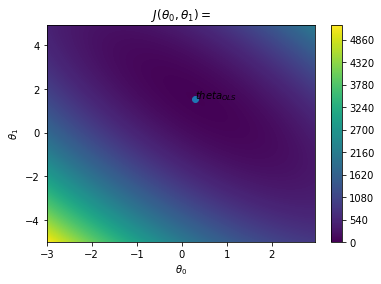

In [11]:
# Para dibujar a los estimadores por mínimos cuadrados (ordinarios)

t0, t1 = np.mgrid[-3:3:.05, -5:5:.05]
z=(t0.reshape(-1,1)+t1.reshape(-1,1)*X-y)**2
z1=z.sum(axis=1).reshape(t0.shape)
plt.contourf(t0,t1,z1,300)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title(r"$J(\theta_0,\theta_1) =$")
plt.colorbar()
plt.scatter(theta0_op_mat, theta1_op_mat)
# Se agrega el punto óptimo encontrado
plt.annotate("$theta_{OLS}$", (theta0_op_mat, theta1_op_mat))

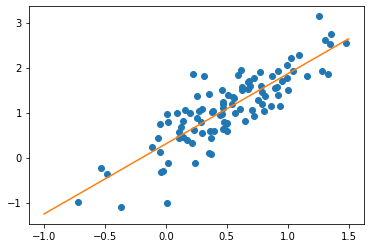

In [12]:
n=len(X)
xrange=np.linspace(-1,1.5,100)
plt.scatter(X,y)
# Se toman los parámetros óptimos encontrados
plt.plot(xrange,theta0_op+theta1_op*xrange,color="tab:orange")